<a href="https://colab.research.google.com/github/carvalhin/AlgBio/blob/main/Algoritmos_em_Bioinform%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INICIALIZAÇÃO

In [64]:
print ('Participantes:')
print(' Ana Flávia Ribeiro de Siqueira')
print(' Igor Rodrigues de Carvalho')
print(' João Victor Assaoka Ribeiro')
print(' Júlia Harue Katsurayama')
print(' Larissa Adelino Ângelo Rosa')
print(' Victor Yo Yin Oliveira')

Participantes:

Ana Flávia Ribeiro de Siqueira

Igor Rodrigues de Carvalho

João Victor Assaoka Ribeiro

Júlia Harue Katsurayama

Larissa Adelino Ângelo Rosa

Victor Yo Yin Oliveira

In [1]:
%pip install biopython matplotlib
%pip install rich

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.6 MB/s eta 0:00:00


In [46]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from rich import print
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.MeltingTemp import Tm_NN
from Bio.Seq import Seq
from Bio import pairwise2 as p2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

## b) Desenvolva um código para fazer a leitura dos arquivos fasta. Utilizar o biopython. Determine o tamanho de cada uma das sequencias importadas.

In [178]:
# Função para ler as sequências de um arquivo fasta e determinar o tamanho de cada uma
def read_fasta_and_get_lengths(fasta_file):
    sequences = []
    lengths = []

    # Lendo o arquivo FASTA
    for record in SeqIO.parse(fasta_file, "fasta"):

        sequences.append(record)
        lengths.append(len(record.seq))
        if(record.id == "NC_019843.3"):
          print(f"[yellow]ID[/yellow]: [white]{record.id}[/white]| Tamanho: {len(record.seq)} nucleotídeos")
        else:
          print(f"[yellow]ID[/yellow]: [white]{record.id}[/white] | Tamanho: {len(record.seq)} nucleotídeos")

    return sequences, lengths


In [179]:
sequences, lengths = read_fasta_and_get_lengths("sequence.fasta")

ID: MN908947.3 | Tamanho: 29903 nucleotídeos

ID: MT012098.1 | Tamanho: 29854 nucleotídeos

ID: MT324062.1 | Tamanho: 29903 nucleotídeos

ID: MZ264787.1 | Tamanho: 29866 nucleotídeos

ID: NC_019843.3| Tamanho: 30119 nucleotídeos

In [6]:
sequences

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947.3', description='MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[]),
 SeqRecord(seq=Seq('ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...GAC'), id='MT012098.1', name='MT012098.1', description='MT012098.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/IND/29/2020, complete genome', dbxrefs=[]),
 SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MT324062.1', name='MT324062.1', description='MT324062.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/ZAF/R03006/2020, complete genome', dbxrefs=[]),
 SeqRecord(seq=Seq('CCTATAACATCACAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGT...AAA'), id='MZ264787.1', name='MZ264787.1', description='MZ264787.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/BRA/CD1739-P4/

## c) Faça um gráfico de barra com frequência dos nucleotídeos de cada um dos registros. Há diferenças nas frequências ? qual poderia ser o motivo desta diferenças ?. Dica: coloque os nucleotídeos em ordem alfabética para facilitar a análise.

In [116]:
# Função para plotar a frequência dos nucleotídeos (A, C, G, T)
def plot_nucleotide_frequency(sequences):
    nucleotides = ['A', 'C', 'G', 'T']
    indg = 0
    for record in sequences:
        # Calculando a frequência de cada nucleotídeo
        freq = {nuc: record.seq.count(nuc) for nuc in nucleotides}


        # Plotando o gráfico de barras
        bar = plt.bar(freq.keys(), freq.values(), color=['blue', 'green', 'red', 'purple'])
        for bar in bar:
          yval = bar.get_height()
          plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')
        #indg = indg + 1
        #plt.subplot(2,3,indg)
        plt.title(f'Frequência de nucleotídeos - {record.id}')
        plt.xlabel('Nucleotídeos')
        plt.ylabel('Frequência')

        plt.show()

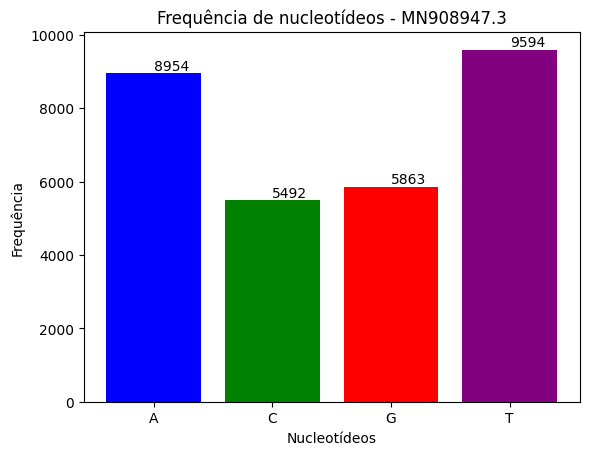

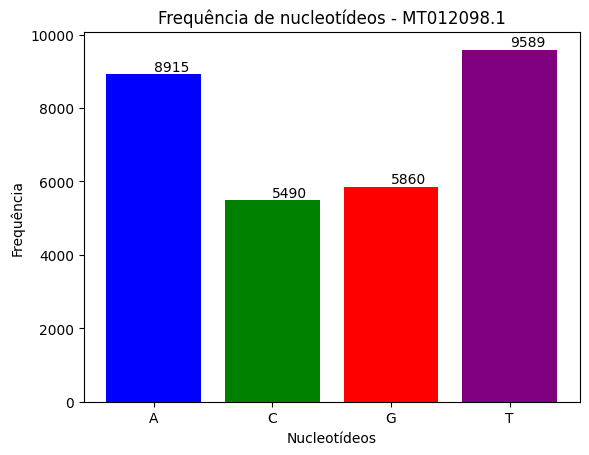

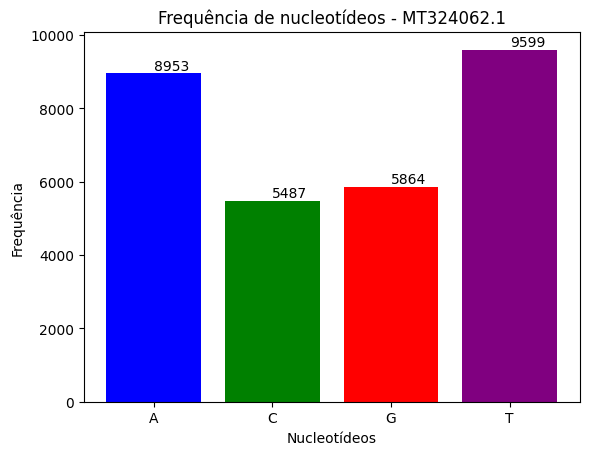

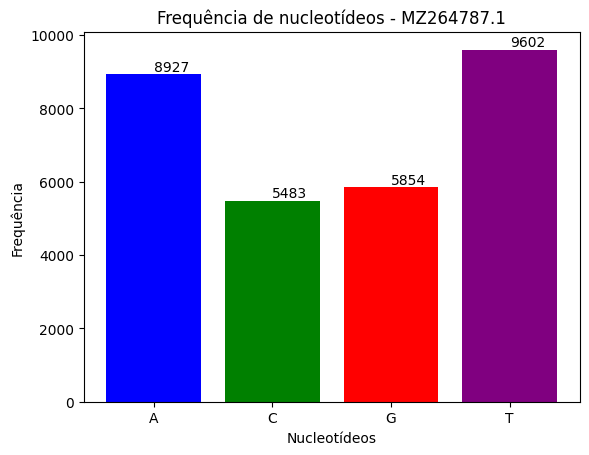

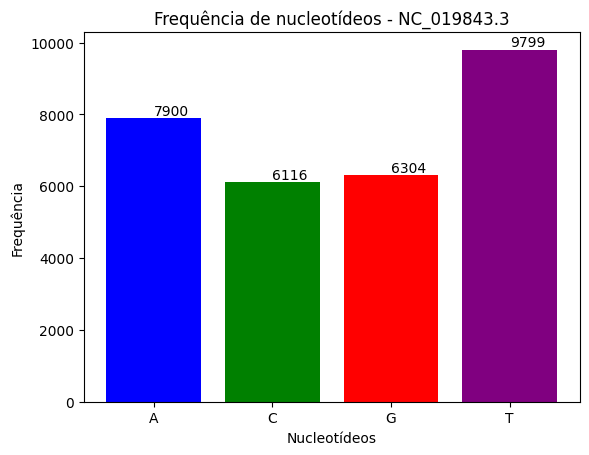

In [117]:
plot_nucleotide_frequency(sequences)

## d) Descubra, qual função dentro do biopython, que fornece o conteúdo GC e escreva um código para calcular a temperatura de melting de cada uma das sequencias. Discute qual é a importância da temperatura de melting para a técnica de PCR ?

In [167]:
def seq_gc_tm(sequences):

    for sequence in sequences:
        seq = sequence.seq

        # Calculando o conteúdo GC
        gc_content = gc_fraction(seq) * 100

        # Calculando a temperatura de melting
        tm = Tm_NN(seq)

  #-------------------------------------------------------------------

        print(f"[yellow]ID[/yellow]: [white]{sequence.id}[/white]")
        print(f"Conteúdo GC: {gc_content:.2f} %")
        print(f"Temperatura de Melting (Tm): {tm:.2f} °C")

seq_gc_tm(sequences)

ID: MN908947.3

Conteúdo GC: 37.97 %

Temperatura de Melting (Tm): 77.76 °C

ID: MT012098.1

Conteúdo GC: 38.02 %

Temperatura de Melting (Tm): 77.78 °C

ID: MT324062.1

Conteúdo GC: 37.96 %

Temperatura de Melting (Tm): 77.76 °C

ID: MZ264787.1

Conteúdo GC: 37.96 %

Temperatura de Melting (Tm): 77.76 °C

ID: NC_019843.3

Conteúdo GC: 41.24 %

Temperatura de Melting (Tm): 79.18 °C

## e) Faça o alinhamento global 2 a 2 dos primeiros 300 primeiros nucleotídeos das sequencias. Imprime e anote o score máximo de cada alinhamento assim como sua similaridade. Faça uma breve análise destes resultados.

In [155]:
#função de alinhamento global
def alinhamento_global(s1,s2):
  #separar 300 primeiros nucleotídeos das sequências (colocar no formato Seq)
  seq1 = Seq(s1[0:300])
  seq2 = Seq(s2[0:300])

  #alinhamento global
  #pontuações: match = 2, mismatch = -1, gap = -1, gapextension = 0
  alinhamento = p2.align.globalms(seq1,seq2,2,-1,-1,0)
  scores = [i[2] for i in alinhamento]   #vetor com todos os scores
  scoremax = max(scores)   #score máximo apenas

  #similaridade
  #match = 1
  alinhamento = p2.align.globalxx(seq1,seq2)
  scoressim = [i[2] for i in alinhamento]   #vetor com todos os scores
  similaridade = (max(scoressim)/300)*100   #similaridade

  return (scoremax, similaridade)

#alinhamentos das sequências
#lista com sequencias
lista_seq = [str(sequences[0].seq), str(sequences[1].seq), str(sequences[2].seq), str(sequences[3].seq), str(sequences[4].seq)]
for i in range(5):
  for j in range(5):
    if i < j:
      print('[yellow]Alinhamento seq[/yellow]',i+1,'[yellow]e[/yellow]',j+1)
      print('score máximo:',alinhamento_global(lista_seq[i],lista_seq[j])[0])
      print('similaridade (%):','{:.2f}'.format(alinhamento_global(lista_seq[i],lista_seq[j])[1]))



Alinhamento seq 1 e 2

score máximo: 572.0

similaridade (%): 95.67

Alinhamento seq 1 e 3

score máximo: 597.0

similaridade (%): 99.67

Alinhamento seq 1 e 4

score máximo: 565.0

similaridade (%): 95.67

Alinhamento seq 1 e 5

score máximo: 314.0

similaridade (%): 68.00

Alinhamento seq 2 e 3

score máximo: 569.0

similaridade (%): 95.33

Alinhamento seq 2 e 4

score máximo: 579.0

similaridade (%): 97.67

Alinhamento seq 2 e 5

score máximo: 303.0

similaridade (%): 66.33

Alinhamento seq 3 e 4

score máximo: 568.0

similaridade (%): 96.00

Alinhamento seq 3 e 5

score máximo: 311.0

similaridade (%): 67.67

Alinhamento seq 4 e 5

score máximo: 300.0

similaridade (%): 66.00

## f) Faça a síntese proteica (tradução) das sequencias e construa um gráfico de barras com a frequências de aminoácidos. Há uma função no biopython que faz esta etapa e coloca todos os aminoácidos em ordem alfabética. Determina o número total de proteínas contidas em cada um das sequencias.

In [65]:
#sintese proteica (tradução) e ordenação dos aminoácidos em ordem alfabética
def traducao_ordenacao(seq_nucleotideo):
  traduzido = seq_nucleotideo.translate()
  lista_seq_proteina = list(traduzido.seq)
  join_lista_seq_proteina = ''.join(lista_seq_proteina)

  #print(join_lista_seq_proteina)
  #print()
  #--------------------------------------------------------------------------
  sorted_lista = ''.join(sorted(join_lista_seq_proteina))

  #print(sorted_lista)
  #print()
  #--------------------------------------------------------------------------

  #seq filtrada
  seq_proteina = ''.join(c for c in sorted_lista if c in string.ascii_letters)

  #print(seq_proteina)
  #print()
  #print()
  return seq_proteina

#gráfico com frequência de aminoácidos
def plot_freq_aminoacido(sequences,seq_proteina):
  aminoacidos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  freq = {aminoacido: 0 for aminoacido in aminoacidos}
  for aminoacido in seq_proteina:
    if aminoacido in freq:
      freq[aminoacido] += 1

  #for aminoacido, qtd in freq.items():
  #  print(f"{aminoacido}: {qtd}")
  #print()
  #print()
  #--------------------------------------------------------------------------

  #gráfico de barras
  plt.bar(freq.keys(), freq.values())
  plt.title(f'Frequência de aminoácidos - {sequences.id}')
  plt.xlabel('Aminoácidos')
  plt.ylabel('Frequência')
  plt.show()
  print()

#numero total de proteinas
def total_proteinas(seq_nucleotideo):

  #aminoácidos
  traduzido = seq_nucleotideo.translate()
  lista_seq_proteina = list(traduzido.seq)
  join_lista_seq_proteina = ''.join(lista_seq_proteina)

  #print(join_lista_seq_proteina)
  #print()
  #--------------------------------------------------------------------------

  #contador de proteinas
  total = 1                   #pois a ultima proteina não possui '*' no final
  for m in range(len(join_lista_seq_proteina)):
    if join_lista_seq_proteina[m] == '*' and join_lista_seq_proteina[m-1].isalpha():
      total = total+1
  print(f'[yellow]Seq. {seq_nucleotideo.id}: [white]{total}[/white] proteínas.[/yellow]')

Seq. MN908947.3: 706 proteínas.

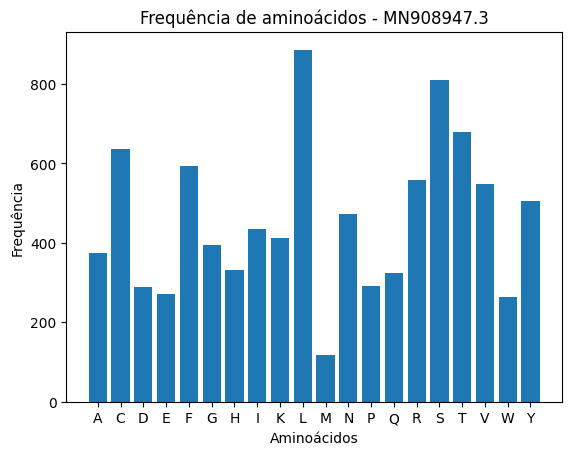

Seq. MT012098.1: 242 proteínas.

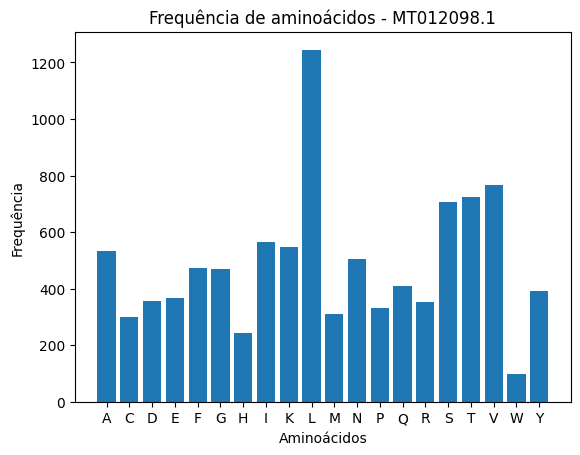

Seq. MT324062.1: 706 proteínas.

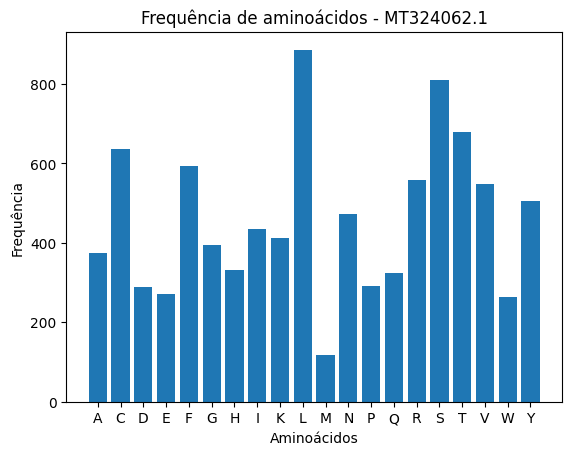

Seq. MZ264787.1: 697 proteínas.

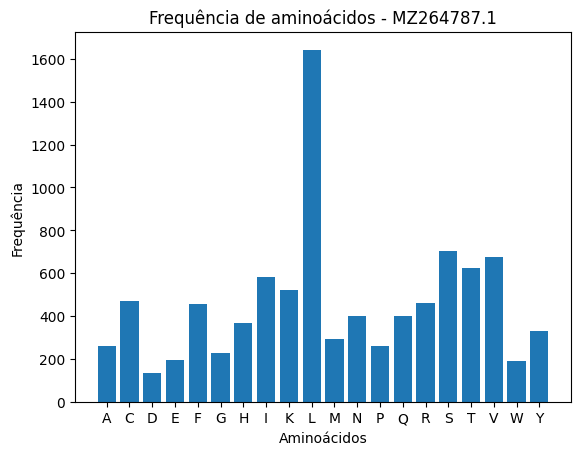

Seq. NC_019843.3: 635 proteínas.

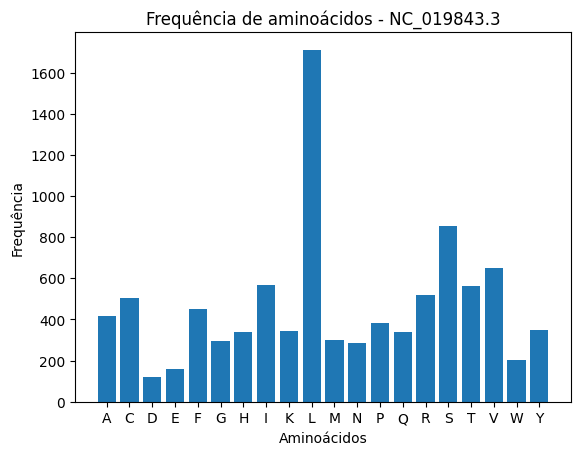

In [59]:
for k in range(5):
    seq_proteina = traducao_ordenacao(sequences[k])
    total_proteinas(sequences[k])
    plot_freq_aminoacido(sequences[k],seq_proteina)


## g)Determine a estrutura secundaria das proteínas das sequências. Para esta pergunta utilize a função proteinanalysis. Discuta os resultados obtidos.

In [166]:
def secundaria(sequences):
    for sequence in sequences:
        seq = sequence.seq

        # Tradução
        protein_seq = sequence.seq.translate()
        an_seq = ProteinAnalysis(str(protein_seq))

        # Composição secundária
        sec_struct = an_seq.secondary_structure_fraction()
        print(f"[yellow]ID[/yellow]: [white]{sequence.id}[/white]")
        print(f"Hélices: {sec_struct[0]*100:.2f} %")
        print(f"Folhas: {sec_struct[1]*100:.2f} %")
        print(f"Giros: {sec_struct[2]*100:.2f} %\n")

# Iterando sobre a lista de nomes de arquivos
secundaria(sequences)

ID: MN908947.3

Hélices: 20.68 %

Folhas: 22.65 %

Giros: 39.23 %

ID: MT012098.1

Hélices: 30.20 %

Folhas: 23.82 %

Giros: 42.86 %

ID: MT324062.1

Hélices: 20.68 %

Folhas: 22.64 %

Giros: 39.24 %

ID: MZ264787.1

Hélices: 29.28 %

Folhas: 17.31 %

Giros: 45.25 %

ID: NC_019843.3

Hélices: 29.19 %

Folhas: 19.27 %

Giros: 44.78 %